# Primer TP de Simulacion

## Grupo 2


### Alumnos:

- Duzac, Emilia
- Belletti, Gabriel Ignacio
- Vazquez, Nicolaz Alberto
- Cohen, Martin

### Generador de numeros aleatorio elegido

MIXMAX

## Ejercicio 1

Implementar generador de numeros aleatorios.
Sobre el generador de números al azar elegido, se pide:
- Implementarlo en función de la especificación del mismo.
- Modificarlo (si aplica) para obtener números al azar entre 0 y 1
- Realizar los gráficos que se consideren adecuados para mostrar las distribuciones de números pseudoaleatorios generados en ambos casos (explicar que se busca interpretar con cada uno de los gráficos)

## Generador MixMax

El RNG MixMax como esta definido en el paper se basa en construir una matriz cuadrada MixMax (N, N) y un vector semilla del tamaño N. Los numeros aleatorios se generan a traves de iteraciones en donde se multiplica el vector semilla con la matriz MixMax para generar un nuevo vector pseudoaleatorio. En este vector generado todos los numeros son pseudoaleatorios.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

Definimos algunos parametros para reutilizar en el notebook

In [4]:
# Parameters defined in paper
N = 139 # Matrix and vector size
s = -1  # Magic number
p = 9223372036853751941 # Modulus

Generamos la matriz MixMax definida en el paper

In [5]:
def generate_mixmax_matrix(size, magic_number):
    
    # Initialize the MIXMAX matrix with ones
    matrix = np.ones((size, size), dtype=int)
    
    # Fill the matrix with the specified pattern
    for i in range(size):
        for j in range(size):
            if i == j and j > 0:
                matrix[i][j] = 2
            elif j < i and j > 0:
                matrix[i][j] = (i + 1) - (j - 1)

    matrix[2][1] += magic_number

    return matrix

mixmax_matrix = generate_mixmax_matrix(N, s)

print(mixmax_matrix)

[[  1   1   1 ...   1   1   1]
 [  1   2   1 ...   1   1   1]
 [  1   2   2 ...   1   1   1]
 ...
 [  1 137 136 ...   2   1   1]
 [  1 138 137 ...   3   2   1]
 [  1 139 138 ...   4   3   2]]


Generamos un vector pseudoaleatorio como semilla

In [6]:
def generate_initial_vector(seed, size, period):

    # Pseudo random vector from seed
    a = 6364136223846793005
    c = 1

    random_numbers = []
    x = seed
    for _ in range(size):
        x = ((a * x + c) % period) / period
        random_numbers.append(x)
    return random_numbers

initial_vector = generate_initial_vector(42, N, p)

print(initial_vector)

[0.9800433435344447, 0.6762309184326339, 0.46660003158132946, 0.32195450331717784, 0.2221489395423314, 0.15328299753945182, 0.10576542648857613, 0.07297825342586531, 0.050355070176595663, 0.03474505038772526, 0.023974120624037296, 0.016542167971612474, 0.011414112971746592, 0.007875749729743213, 0.005434275441209239, 0.0037496556625463934, 0.0025872662767600914, 0.0017852164009945818, 0.0012318011590097989, 0.0008499440709219034, 0.0005864622860689734, 0.00040465958261017026, 0.00027921552960522136, 0.0001926590035749344, 0.00013293491128866099, 9.17252259765311e-05, 6.329050058322302e-05, 4.3670510717519044e-05, 3.0132697462571237e-05, 2.0791592345784034e-05, 1.4346220175283925e-05, 9.898906726086216e-06, 6.830255856561613e-06, 4.712883589775955e-06, 3.2518945405891413e-06, 2.2438105889257357e-06, 1.5482316219465221e-06, 1.068281416901081e-06, 7.371152801164351e-07, 5.08610303975247e-07, 3.509416346232248e-07, 2.421500900580104e-07, 1.670838120363444e-07, 1.1528800273382801e-07, 7.954

Definimos la clase que vamos a usar como generador.

In [7]:
class MixmaxRNG:

    def __init__(self, seed, size, magic_number, period):
        # crea la matriz
        self.matrix = generate_mixmax_matrix(size, magic_number)
        # crea el vector inicial (no se retornaran sus valores)
        self.vector = generate_initial_vector(seed, size, period)
        # self.size = size

    """generates a uniform pseudo random value between 0 and 1,
    you can add an interval (a, b) to return a value between a and b"""
    def generate_number(self, interval=(0,1)):
        # valor pseudo aleatorio
        result = self._generate_new_vector()[0]
        return self._to_interval(result, interval)

    """calculates a new vector of numbers and replaces the current one with the new one with mod 1"""
    def _generate_new_vector(self):
        # calculo el nuevo vector
        new_vector = np.matmul(self.matrix, self.vector)
        # actualizo el vector con mod 1
        self.vector = [i % 1 for i in new_vector]
        return self.vector

    def _to_interval(self, number, interval):
        # encuentro la escala para multiplicar el valor
        scale = interval[1] - interval[0]
        # retorno el valor por la escala trasladando el 0 al minimo del intervalo
        return (number * scale) + interval[0]
        
rng = MixmaxRNG(27, N, s, p)

Tomo una muestra de 10000 * 10000 para generar un scatterplot y hacer un test espectral.

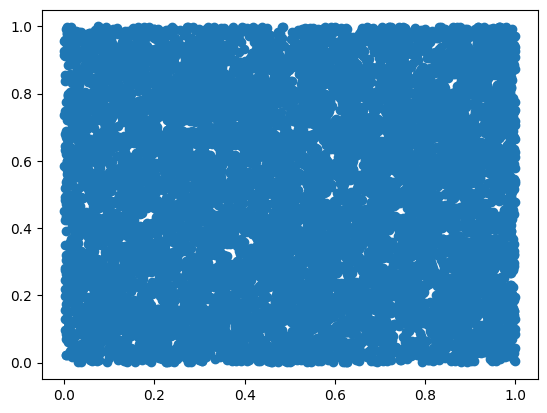

In [8]:
x = []
y = []

for i in range(10000):
    x.append(rng.generate_number())
    y.append(rng.generate_number())

plt.scatter(x, y)

plt.show()

Hago un histgrama con los numeros generados

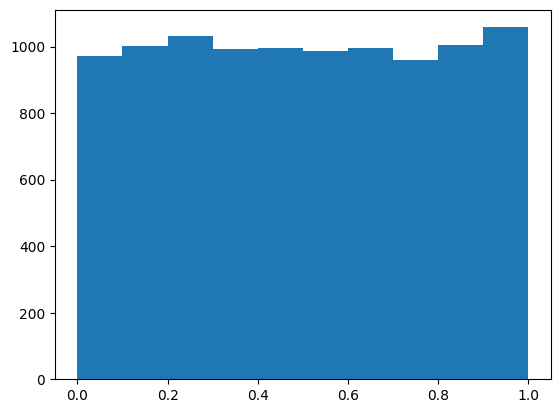

In [9]:
plt.hist(x)

plt.show()

## Ejercicio 2

En este ejercicio se busca aplicar distintos test estadísticos vistos en la materia para evaluar tanto el
comportamiento del generador de números pseudoaleatorios elegido como el comportamiento de otro generador
implementado por otro grupo. El grupo al cual le deben evaluar el generador se encuentra en la planilla de grupos
en Drive.
Para esta tarea se debe solicitar al equipo asignado uno o más lotes de números generados de los tamaños que se
necesiten. El equipo que haya generado los números debe incluir en la notebook entregada el código utilizado
para generar los mismos.


a) Sobre los generadores implementados en el ejercicio 1:
- Proponer, y realizar, al menos 3 tests para evaluar su comportamiento.
- Evaluar e interpretar los resultados de cada test para distintos tamaños de muestras.

Test Chi Cuadrado

In [24]:
#Importamos el test chi2
from scipy.stats import chisquare
import random

significance_levels = [0.05, 0.01]
num_samples = [1000, 10000, 100000]
#H0: nuestros numeros generados siguen una distribución uniforme

#Definimos funciones para contar frecuencias
def _find_expected_frequencies(N):
    expected_frec = [N / 20 for _ in range(20)]
    samples = [rng.generate_number() for _ in range(N)]
    return expected_frec, samples

def _find_observed_frequencies(samples):
    obs_frequency = [0 for _ in range(20)]
    for sample in samples:
        interval = int(sample * 20)
        obs_frequency[interval] += 1
    return obs_frequency

#Creamos la funcion que aplica el test
def calculate_test(N, significance_level):
    expected_frequencies, samples = _find_expected_frequencies(N)
    observed_frequencies = _find_observed_frequencies(samples)
    chi2_value, p_value = chisquare(observed_frequencies, expected_frequencies)
    conclusion = "Se rechaza H0" if p_value < significance_level else "No existe evidencia para rechazar H0"
    return chi2_value, p_value, conclusion

for N in num_samples:
    print("Evaluamos para " + str(N) + " muestras")
    for significance_level in significance_levels:
        print("Utilizando un nivel de significancia " + str(significance_level))
        chi2_value, p_value, conclusion = calculate_test(N, significance_level)
        print("χ² = %f, p = %f" % (chi2_value, p_value) + "\n" + conclusion + "\n")


Evaluamos para 1000 muestras
Utilizando un nivel de significancia 0.05
χ² = 20.320000, p = 0.375558
No existe evidencia para rechazar H0

Utilizando un nivel de significancia 0.01
χ² = 16.160000, p = 0.646577
No existe evidencia para rechazar H0

Evaluamos para 10000 muestras
Utilizando un nivel de significancia 0.05
χ² = 18.640000, p = 0.480139
No existe evidencia para rechazar H0

Utilizando un nivel de significancia 0.01
χ² = 17.496000, p = 0.556303
No existe evidencia para rechazar H0

Evaluamos para 100000 muestras
Utilizando un nivel de significancia 0.05
χ² = 28.103600, p = 0.081455
No existe evidencia para rechazar H0

Utilizando un nivel de significancia 0.01
χ² = 13.317200, p = 0.821944
No existe evidencia para rechazar H0




b) Sobre el generador implementado por el grupo asignado:
- Proponer, y realizar, al menos 3 tests para evaluar su comportamiento.
- Evaluar e interpretar los resultados de cada test para distintos tamaños de muestras.
- Comparar los resultados obtenidos para este generados con los obtenidos en el punto a)

## Ejercicio 3

Un uso posible de los satélites es la captura de imágenes, como se expone en
el trabajo:
Chen, W., Mackin, S., & Palmer, P. (2006). Performance Modelling of Imaging
Service of Earth Observation Satellites with Two-dimensional Markov Chain.
57th International Astronautical Congress. 10.2514/6.IAC-06-B5.3.05
Utilizando el generador del ejercicio 1, y los datasets provistos junto a este
enunciado, se pide:
- Reproducir la generación de localizaciones de imágenes al azar,
mostrada en la figura 5: “Distribution of targets over the globe” de la
sección 4. Resultados. En este caso las imágenes se generan de forma
uniformemente distribuida dentro de los parámetros de latitud y
longitud [−60◦,60◦] [−150◦, 150◦] , respectivamente.
- Modificar el método para sólo generar localizaciones de imágenes
dentro del continente australiano (figuras 22 y 23 del dataset). De aplicar, en función del método elegido,
calcular el factor de rendimiento de forma empírica.

## Ejercicio 4

Utilizando el generador de números pseudoaleatorios implementado en el ejercicio 1, y el trabajo
Li, Xiaomeng & li, Xingang & Wang, Jiangfeng. (2012). Using Cellular Automata to Investigate Pedestrian Conflicts
with Vehicles in Crosswalk at Signalized Intersection. Discrete Dynamics in Nature and Society. 2012.
10.1155/2012/287502.
Resolver:
- Simular al menos 2 escenarios planteados en el trabajo y comparar sus resultados.
- Proponer al menos 2 modificaciones a los escenarios planteados para peatones, autos, semáforos y
arterias de circulación, simularlas y comparar sus resultados.
- Realizar los gráficos que se consideren necesarios para mostrar los resultados
- Seleccionar un escenario de los simulados y realizar una animación utilizando los datos simulados

### Descripcion del escenario planteado:

Se utiliza un modelo de autómata celular para simular el tráfico.

Idealización del sistema físico en el que se supone que tanto el espacio como el tiempo son discretos y cada una de las unidades que
interactúan puede tener solo un número finito de estados discretos.
En los autómatas celulares el espacio se divide en muchas unidades, mediante métodos in-erráticos, cuadrícula con ciertas formas.
Cada unidad en la cuadrícula in-errática se llama celda, que solo puede tomar su valor en el conjunto de estados discretos limitados.
Todas las células siguen las mismas reglas de funcionamiento y dinámica discreta en la naturaleza y la sociedad.

Actualizar según las reglas parciales fijadas.
Un gran número de células constituyen la evolución del sistema dinámico mediante la simple interacción.
Los componentes más básicos de los autómatas celulares incluyen cuatro partes: celdas, espacio de celda, vecinos y reglas.
Además, también se debe incluir el estado de las celdas.

El modelo de autómata celular en el artículo se desarrolla para simular un cruce de peatones en una intersección señalizada con un
ciclo de tiempo de señal peatonal fijo de $90 s$.
La fase de la señal para peatones está diseñada en seis clases,
que tienen una duración de tiempo verde de $25 s$, $30 s$, $35 s$, $40 s$, $45 s$ y $50 s$, correspondientes a
$65 s$, $60 s$, $55 s$, $50 s$, $45 s$ y $40 s$ de duración del tiempo rojo, respectivamente.
El segmento de la carretera que conecta con la intersección está diseñado como carriles de dos vías para seis vehículos y
el ancho de cada carril es de 3,5 metros.
El ancho del paso de peatones también está diseñado en 6 clases, que son $2,5 m$, $3 m$, $3,5 m$, $4 m$, $4,5 m$ y $5 m$ con una longitud de cruce de $21 m$.
Además, se han establecido dos áreas de espera para peatones a ambos lados del paso de peatones con capacidad para 100 peatones como máximo cada vez.
En este modelo, el paso de peatones se divide en celdas cuadradas de $0,5 × 0,5 m^2$.
Cada celda está ocupada por un peatón o vacía. Las velocidades iniciales asignadas al peatón pueden ser 2, 3, 4, 5 o 6 celdas por segundo,
lo que representa que sus velocidades reales son $1 m/s$, $1,5 m/s$, $2 m/s$, $2,5 m/s$, y $3 m/s$, respectivamente.
Las proporciones de los cinco tipos de velocidades se basan en los resultados de la observación de campo,
que comparten 27,3%, 52%, 13,7%, 4,8% y 2,2% respectivamente. A través de la comparación de la velocidad asignada y
el número de celdas vacías frontales verticales, cada peatón actualiza su velocidad en cada paso de tiempo.
Se supone que cada vehículo ocupa 6 × 5 celdas y su velocidad en el cruce de peatones es de $5 m/s$.

Generalmente, existen dos tipos de condiciones de contorno en los modelos de simulación de autómatas celulares:
la condición de contorno periódica y la condición de contorno abierto.
Por razones tanto prácticas como teóricas, las dos condiciones de contorno son preferibles en diferentes situaciones.

- En la condición de frontera periódica, los límites relativos están vinculados y se genera un estado estacionario invariante de traducción en el sistema.
- Por otro lado, la condición de límite abierto concuerda con una cierta probabilidad cuando se inserta y retira un vehículo de la celda límite,
en la que la invariancia traslacional se rompe, pero aún se pueden esperar estados estacionarios con un perfil de densidad no trivial.

En comparación con la condición de frontera periódica, la condición de frontera abierta es más realista y coherente para el modelo del artículo.
Por tanto, se adopta la condición de frontera abierta.

### Reglas del escenario planteado:

#### Celdas:

Cada celda mide $0.5$ metros cuadrados ($0.5m × 0.5m$).

- Segmento de carretera: cuenta con dos carriles, para 6 vehiculos.
  - Carriles: ancho $3,5$ metros (7 celdas).
  - $4$ áreas de posibles coliciones.
- Paso de peatones:
  - Ancho: posibles valores $2,5 m$, $3 m$, $3,5 m$, $4 m$, $4,5 m$ y $5 m$.
  - Largo: longitud de cruce de $21 m$, que corresponde a los 6 carriles de carretera ($3.5 × 6 = 21$).
  - Pueden haber hasta 100 peatones esperando en el cruce.
- Cada celda solo puede estar ocupada por una entiidad a la vez.
  - Un peaton solo ocupa $1$ celda.
  - Un vehiculo ocupa $6 × 5$ celdas y su velocidad en el cruce de peatones es de $5 m/s$

#### Señales:

Total de periodo de semaforo $90 s$ (solo verde o rojo).
Fase de la señal para peatones (en segundos):

| Verde | Rojo |
|-------|------|
| 25    | 65   |
| 30    | 60   |
| 40    | 55   |
| 45    | 45   |
| 50    | 40   |

#### Movimiento:

Hay tres leyes básicas de movimiento en los modelos de autómatas celulares para describir el comportamiento de los peatones:

- movimiento lateral: representa el comportamiento de cambio de trayectoria de un peatón, cuyo resultado es obtener espacio de aceleración y evitar una colisión frontal.
- movimiento lineal: considera la velocidad de preferencia personal y otros peatones cercanos para identificar el número de pasos para avanzar.
- evitación de colisiones: se refiere al comportamiento de cómo evitar colisiones frontales entre peatones que caminan cerca uno del otro en dirección opuesta.

En la evolución de este modelo, tanto los peatones como los vehículos deben cumplir con las reglas de sus movimientos

#### Reglas para peatones:

Arribo, (es una distribucion Poisson).
$P_k = \frac{(λ_p)^{k}}{k!} × e^{-λt} = 0$

Donde:
- $P_k$ denota la probabilidad de alcanzar k peatones durante el intervalo de conteo t.
- $λ_p$ denota la tasa media de llegada de peatones cápita/segundo.
- $t$ denota cada intervalo de tiempo contado.

En la evolución de este modelo, los peatones dan prioridad a la celda frontal como destino.
El peatón puede avanzar en las celdas o cambiar a la izquierda o a la derecha cuando está bloqueado.

La velocidad inicial del peatón (en celdas) que ingresa al cruce de peatones $v_{i,j}$, se asigna de acuerdo con:
- 6 caso: $p > 0.978$
- 5 caso: $0.978 ≥ p > 0.93$
- 4 caso: $0.93 ≥ p > 0.793$
- 3 caso: $0.793 ≥ p > 0.273$
- 2 caso: $0.273 ≥ p ≥ 0$

Donde:
- $p$ es un número aleatorio entre 0 y 1.
- $v_{i,j}$ denota la velocidad del peatón cuya ubicación es $x_{i,j}$.

La dinámica discreta en la naturaleza y la sociedad La velocidad del peatón en el cruce de peatones durante la simulación
se actualiza sobre la base de $v_{i,j} = min(d_{i,j}, v_{i,j})$.
Donde:
- $d_{i,j}$ denota el número de celdas vacías entre el peatón objetivo y su peatón verticalmente frontal más cercano.
- $x_{i,j}$ denota la ubicación del peatón.
- $v_{i-n,j±1}$ denota la velocidad del peatón cuya ubicación es xi−n, j±1 y es el primero detrás de la celda xi, j±1. El número de celdas vacías entre ellas es n.

Debido a que varios peatones pueden competir por una celda vacía y cada celda puede estar vacía u ocupada exactamente por un peatón,
existirán conflictos entre peatones en la evolución del modelo. Si ocurren conflictos,
el sistema seleccionará un peatón para que ocupe la celda al azar con la misma probabilidad.
El peatón seleccionado se moverá al destino en el siguiente paso de tiempo y el peatón que no esté seleccionado permanecerá en su ubicación original.
Los peatones tienen que esperar en el área de espera una vez que llegan a la hora del semáforo en rojo y
se supone que todos los peatones siguen las reglas de tránsito sin ningún comportamiento intencional al pasar el semáforo en rojo.
El comportamiento de pasar el semáforo en rojo solo ocurre en los peatones que no han terminado de cruzar cuando termina el semáforo en verde.
Cuando comience la luz verde, comenzarán a cruzar a las velocidades asignadas y acelerarán a la velocidad máxima para completar el cruce
si la luz verde termina.

El modelo simplifica el proceso de conflicto entre peatones opuestos.
Los peatones en direcciones opuestas pueden cruzarse entre sí si su celda de destino está vacía; de lo contrario,
necesitarán ajustar sus velocidades o mantener su posición original.

#### Reglas para vehiculos:

La ley de llegada de los vehículos es la misma que la de los peatones,
que sigue de manera similar la distribución de Poisson. Su tasa de llegada es $λv$.

Cuando el semáforo para peatones está en rojo y no hay ningún peatón en el cruce de peatones,
los vehículos pueden cruzar por la intersección. De lo contrario, se enfrentarían a conflictos con los peatones.

#### Reglas para conflictos entre peatones y vehículos:

En el trabajo publicado, de acuerdo con la relación de ocupación temporal y espacial de los usuarios de la vía en la intersección,
los conflictos entre peatones y vehículos se clasifican en 4 áreas, en la que los conflictos entre peatones y vehículos se pueden diferenciar
en 4 tipos de la siguiente manera:

- Área 1: conflictos entre vehículos que giran a la derecha desde el interior de la intersección y peatones, asumiendo que se permite girar a la derecha en rojo en la aproximación.
- Área 2: conflictos entre vehículos que se mueven en línea recta o que giran a la izquierda desde el interior de la intersección y peatones que van a baja velocidad o aquellos que cruzan la calle al final de la luz verde, asumiendo que los vehículos no tienen comportamiento al pasar la luz roja.
- Área 3: conflictos entre vehículos del segmento que se mueven en línea recta o que giran a la izquierda y peatones con velocidad lenta o aquellos que cruzan la calle al final de la luz verde, asumiendo que los vehículos no tienen comportamiento de pasar la luz roja.
- Área 4: conflictos entre vehículos que giran a la derecha del segmento y peatones, asumiendo que se permite girar a la derecha en rojo en la aproximación.

Hay dos definiciones relacionadas con el conflicto involucradas en el trabajo publicado. Uno es el evento de conflicto entre peatones y vehículos,
y el otro es el retraso del conflicto de peatones.
En este estudio de simulación, un evento de conflicto entre vehículo y peatón en un cruce de peatones se define como la situación en la que,
para evitar una colisión con un peatón,
el vehículo deja de avanzar hacia las celdas que actualmente están ocupadas por al menos un peatón o que estarán ocupadas. por al menos un peatón.
La demora por conflicto de peatones significa el tiempo de parada durante el cual
los peatones se estancan en el cruce de peatones para evitar el paso de los vehículos cuando ocurre un conflicto.
Si se alivia el conflicto, los peatones podrán seguir cruzando. Las reglas de conflicto se asignan de la siguiente manera.

- Si la celda objetivo del peatón está ocupada por un vehículo, el vehículo tiene prioridad para cruzar. Del mismo modo, si la celda objetivo del vehículo está ocupada por peatones, se dará prioridad a los peatones.
- Si el peatón y el vehículo tienen la misma celda objetivo, lo que significa que sus próximos pasos se superponen, el sistema dará prioridad de paso a uno de ellos aleatoriamente con la misma probabilidad, es decir, 0,5.

### Codigo de resolucion

#### Constantes

Los valores provienen de las reglas antes mencionadas.

In [48]:
# valores fijos definidos por las reglas

# tiempo maximo de periodo para el semaforo
TRAFFIC_LIGHT_TOTAL_TIME = 90
# lista de tiempos base que el semaforo está en verde
TRAFFIC_GREEN_LIGHT_BASE_TIME_POSSIBILITIES = (25, 30, 35, 40, 45, 50)
# valor de la velocidad inicial segun las posibilidades,
# ordenados segun su vínculo con la probabilidad
# la velocidad esta expresada en celdas/tiempo
PEDESTRIAN_INITIAL_VELOCITY_POSSIBILITIES = (6, 5, 4, 3, 2)
# valor de la probabilidad velocidad inicial segun las posibilidades
# (ordenados de mayor a menor)
PROBABILITY_PEDESTRIAN_INITIAL_VELOCITY_POSSIBILITIES = (0.978, 0.93, 0.793, 0.273, 0.0)
# probabilidad de prioriedad de movimiento del peaton ante un vehiculo
PROBABILITY_PEDESTRIAN_PRIORITY_BEFORE_VEHICLE = 0.5
# tamaño de vehiculo
VEHICLE_SIZE_BROAD = 5
VEHICLE_SIZE_LONG = 6
# velocidad de vehiculo (1 metro = 2 celdas)
# la velocidad esta expresada en celdas/tiempo
VEHICLE_SPEED = 10
# tamaño del carril
LANE_SIZE_BROAD = 7
# cantidad de carriles
NUMBER_OF_LANES = 6
# Posibles ancho del paso de peatones (1 metro = 2 celdas)
CROSSWALKS_WIDTH_POSSIBILITIES = (5, 6, 7, 8, 9, 10)
# el largo del paso de peatones son 21 metros que son 42 celdas que equivale a los 6 carriles
CROSSWALKS_LARGE_POSSIBILITIES = 42
# verificacion (por posibles cambios)
if CROSSWALKS_LARGE_POSSIBILITIES != LANE_SIZE_BROAD * NUMBER_OF_LANES:
    raise ValueError("el tamaño de los carriles y el largo de la senda peatonal no coinciden")
# cantidad de peatones maxima en espera al borde de la senda peatonal
WAITING_PEDESTRIAN_CAPACITY = 100


#### Parametros

Valores predefinidos para la simulacion.

In [ ]:
def get_vehicle_arrival_rate(n=6):
    result = []
    for i in range(1, n + 1):
        result.append(0.02 * i)
    return result

def get_pedestrian_arrival_rate(base=1000.0,n=10):
    seconds_in_a_hour = 3600.0
    arrival_rate_base = base / seconds_in_a_hour
    result = []
    for i in range(1, n + 1):
        result.append(arrival_rate_base * i)
    return result

#### Tipos

In [ ]:
class Poisson:
    def __init__(self, value_lambda, funtion_uniform):
        # self.iter = 0
        self.p = 1.0
        self.value_lambda = value_lambda
        self.funtion_uniform = funtion_uniform

    # todo REVISAR ESTA FORMULA https://www.columbia.edu/~ks20/4404-Sigman/4404-Notes-ITM.pdf
    # todo considerar realizar un poisson con exponenciales
    def get_random_numbers(self):
        # x = self.iter
        result = self.p
        while result > np.exp(-self.value_lambda):
            uniform = self.funtion_uniform.generate_number()
            result *= uniform
            # x += 1
        return result

In [49]:
"""representation of the specific location of the board"""
class Cell:
    def __init__(self):
        self.content = None

    def is_empty(self):
        return self.content is None

    def transfer(self, new_content=None):
        self.content = new_content

In [ ]:
class PedestrianWaitingSpace:
    def __init__(self, pedestrian_arrival_rate):
        self.waiting_quantity = 0
        self.waiting_capacity = WAITING_PEDESTRIAN_CAPACITY
        self.poisson = Poisson(pedestrian_arrival_rate, None) # todo remplazar None

    def tick(self, is_green_light):
        # se genera un valor aleatorio
        random_value_poisson = self.poisson.get_random_numbers() # todo
        # caso donde se supera la cantidad maxima de peatones solo llega al maximo
        if self.waiting_quantity + random_value_poisson > WAITING_PEDESTRIAN_CAPACITY:
            self.waiting_quantity = WAITING_PEDESTRIAN_CAPACITY
        else:
            # el valor aleatorio crea N peatones en espera
            self.waiting_quantity += random_value_poisson
        # caso de semaforo verde: los peatones intentan moverse para salir de la espera
        if is_green_light:
            # todo
            # Se comunica con el tablero para decir que hay peatones a moverse
            return self.waiting_quantity
        # caso de semaforo rojo: siguen esperando
        return 0

    def pedestrians_waiting(self):
        return self.waiting_quantity

In [ ]:
class TraficLane:
    def __init__(self, vehicle_arrival_rate, from_upper, cells_to_pass, green_driving=False):
        self.from_upper = from_upper
        # self.vehicle_arrival_rate = vehicle_arrival_rate
        self.poisson = Poisson(vehicle_arrival_rate, None) # todo remplazar None
        self.green_driving = green_driving
        self.waiting_quantity = 0
        self.cells_to_pass = cells_to_pass

    def tick(self, is_green_light):
        # se genera un valor aleatorio
        random_value_poisson = self.poisson.get_random_numbers() # todo
        self.waiting_quantity += random_value_poisson
        # caso de carril bloqueado no se traslada
        if self._is_blocked_lane():
            return 0
        # caso de conduccion en verde NO permitida y caso de semaforo verde: se detiene y espera
        if not self.green_driving and is_green_light:
            return 0
        # caso de conduccion en verde permitida o caso de semaforo rojo: se intenta trasladar
        return self.waiting_quantity

    def vehicles_waiting(self):
        return self.waiting_quantity

    """returns true if there is at least one locked cell"""
    def _is_blocked_lane(self):
        for cell in self.cells_to_pass:
            if not cell.is_empty():
                return True
        return False

    def get_cells(self):
        return self.cells_to_pass

In [ ]:
"""representation of a pedestrian traffic light"""
class TraficLight:
    def __init__(self, green_pos):
        self.green_time = 0
        self.red_time = 0
        # actualizo el tiempo de las luces
        self._traffic_light_times(green_pos)
        # caso de falla por parametro incorrecto
        if self.green_time == 0 or self.red_time == 0 or self.red_time == TRAFFIC_LIGHT_TOTAL_TIME:
            raise ValueError("Error, in creation of the traffic light.")
        self.actual_time = 0

    def _traffic_light_times(self, green_pos):
        types_traffic_green_light_base_time = TRAFFIC_GREEN_LIGHT_BASE_TIME_POSSIBILITIES
        if green_pos > len(types_traffic_green_light_base_time) or green_pos < 0:
            raise ValueError("Not exist traffic light base time type. Existing types 0 to " + str(len(types_traffic_green_light_base_time)) + ". wrong type entered: " + green_pos)
        self.green_time = types_traffic_green_light_base_time[green_pos]
        self.red_time = TRAFFIC_LIGHT_TOTAL_TIME - self.green_time

    def is_green_light(self):
        # inicia el semaforo en verde luego se pasa a rojo
        return self.actual_time > self.green_time

    def is_initial_period(self):
        return self.actual_time == 0

    def tick(self):
        # el tiempo actual varia en el rango de [0;90)
        self.actual_time = (self.actual_time + 1) % TRAFFIC_LIGHT_TOTAL_TIME

In [50]:
"""representation of the board where the simulation occurs"""
class Cross:
    def __init__(self, crosswalks_width, pedestrian_arrival_rate, vehicle_arrival_rate, green_pos):
        # Creacion del cruze peatonal
        self.matriz = self._generate_matriz(crosswalks_width)
        # Creacion de las zonas de esperas de los peatones
        self.pedestrian_waiting_space_rigth = PedestrianWaitingSpace(pedestrian_arrival_rate)
        self.pedestrian_waiting_space_left = PedestrianWaitingSpace(pedestrian_arrival_rate)
        # Creacion de la luz de trafico peatonal
        self.trafic_light = TraficLight(green_pos)
        # Creacion de los carriles
        self.lanes = []
        for n_lane in range(NUMBER_OF_LANES):
            cells_to_vehicles = self._get_cells_to_vehicle(n_lane)
            lane = TraficLane(vehicle_arrival_rate, self._lane_is_upper(n_lane), cells_to_vehicles, self._lane_is_green_move(n_lane))
            self.lanes.append(lane)

    def _get_cells_to_vehicle(self, n_lane):
        # LANE = 7 = 1 + VEHICLE_SIZE_BROAD + 1
        margin = (LANE_SIZE_BROAD - VEHICLE_SIZE_BROAD) / 2
        # caso de error de cuentas
        if margin * 2 + VEHICLE_SIZE_BROAD != LANE_SIZE_BROAD:
            raise ValueError("Error, in margin of line.")
        # calculo de celdas, tener en cuenta que los autos van a 10 celdas por segundo y el ancho maximo del cruce es de 7 celdas
        cells = []
        for crosswalk in self.matriz:
            # debe ser 7N + 1
            left = n_lane * LANE_SIZE_BROAD + margin
            # debe ser 7(N+1) - 1
            rigth = (n_lane + 1) * LANE_SIZE_BROAD - margin
            cells_cros_walk = crosswalk[left:rigth]
            # caso de calculo fallido
            if len(cells_cros_walk) != VEHICLE_SIZE_BROAD:
                raise ValueError("Error, in get borders of cross walk cells.")
            cells.extend(cells_cros_walk)
        return cells


    @staticmethod
    def _lane_is_upper(n_lane):
            # La primer mitad de los carriles los autos van desde la parte superior del tablero
            if n_lane < NUMBER_OF_LANES / 2:
                return True
            return False

    @staticmethod
    def _lane_is_green_move(n_lane):
            # Solo los carriles del borde pueden moverse en luz peatonal verde
            if n_lane == 0 or n_lane == (NUMBER_OF_LANES - 1):
                return True
            return False

    def _generate_matriz(self, crosswalks_width):
        crosswalks = []
        for i in range(crosswalks_width):
            # representacion del camino recto que deberian seguir los peatones
            crosswalk = []
            for j in range(CROSSWALKS_LARGE_POSSIBILITIES):
                crosswalk.append(Cell)
            crosswalks.append(crosswalk)
        return crosswalks

    def get_distance_to_next_obstacle(self, initial_pos, rigth):
        # "rigth" hace referencia a la derecha desde la perspectiva del tablero
        # el equivalente (respecto al peaton) de "rigth" o "left" en este caso seria solo "forward"
        crosswalk = self.matriz[initial_pos[0]]
        result = 0
        # caso donde se mueve a la derecha
        if rigth:
            for n in range(initial_pos[1] + 1, len(crosswalk)):
                # caso donde la celda esta bloqueada
                if not crosswalk[n].is_empty():
                    return result
                # caso donde la celda NO esta bloqueada y es la ultima
                if n == len(crosswalk):
                    # se le suma dos, uno por la celda no bloqueada y otro por la finalizacion del recorrido
                    return result + 2
                # la celda NO esta bloqueada y NO es la ultima
                result += 1
        # caso donde se mueve a la izquierda
        else:
            for n in range(initial_pos[1] - 1, 0, -1):
                # caso donde la celda esta bloqueada
                if not crosswalk[n].is_empty():
                    return result
                # caso donde la celda NO esta bloqueada y es la ultima
                if n == 0:
                    # se le suma dos, uno por la celda no bloqueada y otro por la finalizacion del recorrido
                    return result + 2
                result += 1
        return result

    def lateral_movement_allowed(self, initial_pos, rigth):
        # "rigth" hace referencia a la derecha desde la perspectiva del peaton
        # el equivalente (respecto al tablero) de "rigth" es arriba y de "left" abajo
        if rigth:
            new_pos = (initial_pos[0] + 1, initial_pos[1])
        else:
            new_pos = (initial_pos[0] - 1, initial_pos[1])
        return self._get_pos(new_pos).is_empty()

    def _get_pos(self, pos):
        return self.matriz[pos[0], pos[1]]

    """The execution of this function involves the passage of one second"""
    def tick(self):
        # Los ticks representan en este problema el pasod e un segundo
        # Actualizo el semaforo
        self.trafic_light.tick()
        # Obtengo el estado de la luz del semaforo
        green_ligth = self.trafic_light.is_green_light()
        # Actualizo las zonas de espera de los peatones
        waiting_rigth = self.pedestrian_waiting_space_rigth.tick(green_ligth)
        waiting_left = self.pedestrian_waiting_space_left.tick(green_ligth)
        # Actualizo los carriles
        waiting_vehicle = []
        for line in self.lanes:
            waiting_vehicle.append(line.tick(green_ligth))
        # Actualizo a los peatones
        self._update_crosswalk(waiting_rigth, waiting_left, waiting_vehicle)

    def _update_crosswalk(self, waiting_rigth, waiting_left, waiting_vehicle):
        # todo terminar
        # celdas marcadas para el paso de vehiculos
        cells_reserved_for_vehicles = []
        # numero de carril
        n_lane = 0
        # verifico si hay autos que quieren pasar
        for vehicle in waiting_vehicle:
            # ningun auto quiere pasar
            if vehicle == 0:
                continue
            # al menos un auto compite con los peatones para pasar
            # se toma un valor al azar uniforme
            val_uniform = 0 # todo aca deberia estar el generador aleatorio
            # si el valor supera la prioriedad de los peatones pasa el vehiculo
            if val_uniform >= PROBABILITY_PEDESTRIAN_PRIORITY_BEFORE_VEHICLE:
                # obtengo las celdas a bloquear
                cells = self.lanes[n_lane].get_cells()
                # agrego las celdas donde va a pasar el vehiculo
                cells_reserved_for_vehicles.extend(cells)
            n_lane += 1
        # todo
        # analizo todas las celdas en busca de los peatones
        #
        return

    # Info estadistica

    """It is the beginning of the traffic light period"""
    def is_initial_period(self):
        return self.trafic_light.is_initial_period()

    """returns the number of pedestrians who failed to complete the crossing"""
    def get_missing_pedestrians(self):
        n_missing_pedestrians = 0
        for crosswalk in self.matriz:
            for cell in crosswalk:
                if not cell.is_empty():
                    n_missing_pedestrians += 1
        return n_missing_pedestrians

    """returns the number of pedestrians who are waiting at the edges of both intersections and who have not yet begun to cross"""
    def get_pedestrians_waiting(self):
        pedestrians_waiting_left = self.pedestrian_waiting_space_left.pedestrians_waiting()
        pedestrians_waiting_right = self.pedestrian_waiting_space_rigth.pedestrians_waiting()
        return pedestrians_waiting_left, pedestrians_waiting_right

    """returns the number of vehicles who are waiting (per lane) and who have not yet begun to cross"""
    def get_vehicles_waiting(self):
        result = []
        for lane in self.lanes:
            result.append(lane.vehicles_waiting())
        return result

In [51]:
"""representation on the dashboard of a pedestrian"""
class Pedestrian:
    def __init__(self, pos, to_right=False):
        # posicion actual del peaton
        self.pos = pos
        # posicion tentativa (a trasladarse) del peaton
        self.attempt_pos = pos
        # indica si el peaton quiere ir hacia la derecha, o izquierda
        self.direction_is_right = to_right
        # velocidad del peaton
        self.vel = 0

    def transfer(self):
        self.pos = self.attempt_pos

    def is_transferred(self):
        return self.pos == self.attempt_pos

In [52]:
"""representation on the dashboard of a vehicle"""
class Vehicle:
    def __init__(self, cell, to_uper=False):
        self.cell = cell
        self.vel = 0

#### Funciones

In [53]:
"""receives a vector with pedestrians and a uniform random value between 0 and 1, returns a pedestrian"""
def pedestrian_selection_for_cell(pedestrians, val_p):
    # caso donde el valor inicial era 1
    if val_p == 1.0:
        return pedestrians[-1]
    # obtengo la cantidad de peatones que compiten por la celda
    cant = len(pedestrians)
    # el valor aleatorio es entre 0 y 1 lo ultiplico por la cantidad
    # asi obtengo un valor aleatorio entre 0 y la cantidad
    # se le aplica int para eliminar los decimales
    random_pos = int(val_p * cant)
    return pedestrians[random_pos]

"""Test of pedestrian_initial_velocity"""
def test_pedestrian_selection_for_cell():
    vec = (0, 1, 2, 3, 4)
    val = pedestrian_selection_for_cell(vec, 0.0) == 0
    val &= pedestrian_selection_for_cell(vec, 1.0) == 4
    val &= pedestrian_selection_for_cell(vec, 0.2) == 1
    val &= pedestrian_selection_for_cell(vec, 0.4) == 2
    val &= pedestrian_selection_for_cell(vec, 0.6) == 3
    val &= pedestrian_selection_for_cell(vec, 0.8) == 4
    val &= pedestrian_selection_for_cell(vec, 0.19) == 0
    val &= pedestrian_selection_for_cell(vec, 0.39) == 1
    val &= pedestrian_selection_for_cell(vec, 0.59) == 2
    val &= pedestrian_selection_for_cell(vec, 0.79) == 3
    if val:
        print("OK")
    else:
        print("ERROR")

test_pedestrian_selection_for_cell()

OK


In [54]:
"""receives a random value between 0 and 1, uses that value to know if the pedestrian has priority over a vehicle competing for the same cell, returns true if the pedestrian has priority"""
def pedestrian_priority_before_vehicle(vel_p):
    return vel_p < PROBABILITY_PEDESTRIAN_PRIORITY_BEFORE_VEHICLE

In [56]:
"""given a random value and two vectors, one of values ordered from highest to lowest and another of results.
It will return the equivalent of the results according to the largest number in the vector to which the random value is greater."""
def get_discrete_value_according_to_probability(val_p, interval, vec):
    # caso nulo retorna el ultimo valor
    if val_p == 0.0:
        return vec[-1]
    # verifica que sea mayor al numero del vector
    # (el vector empieza ordenado como pre condicion)
    for i in range(len(interval)):
        if val_p > interval[i]:
            return vec[i]

"""given a random value it will return The initial speed of the pedestrian entering the crosswalk,
according to the previous rules."""
def pedestrian_initial_velocity(val_p):
    # valor de la velocidad segun las reglas
    vec = PEDESTRIAN_INITIAL_VELOCITY_POSSIBILITIES
    # probabilidad del valor de la velocidad segun las reglas
    interval = PROBABILITY_PEDESTRIAN_INITIAL_VELOCITY_POSSIBILITIES
    return get_discrete_value_according_to_probability(val_p, interval, vec)

"""Test of pedestrian_initial_velocity"""
def test_pedestrian_initial_velocity():
    val = pedestrian_initial_velocity(1.0) == 6
    val &= pedestrian_initial_velocity(0.979) == 6
    val &= pedestrian_initial_velocity(0.978) == 5
    val &= pedestrian_initial_velocity(0.931) == 5
    val &= pedestrian_initial_velocity(0.930) == 4
    val &= pedestrian_initial_velocity(0.794) == 4
    val &= pedestrian_initial_velocity(0.793) == 3
    val &= pedestrian_initial_velocity(0.274) == 3
    val &= pedestrian_initial_velocity(0.273) == 2
    val &= pedestrian_initial_velocity(0.001) == 2
    val &= pedestrian_initial_velocity(0.0) == 2
    if val:
        print("OK")
    else:
        print("ERROR")

test_pedestrian_initial_velocity()

OK
